In [1]:
#Importing libraries
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy
scipy.__version__

'1.9.3'

In [2]:
## load the insurance.csv. display info and head
df = pd.read_csv('data/insurance.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Q1: Do smokers have higher insurance charges than non-smokers?

## 1. State the Hypothesis & Null Hypothesis
 - (Null Hypothesis): no difference in insurance charges between smokers and non smokers
 - (Alternative Hypothesis): smokers have a higher insurance charges than non smokers

## 2. Determine the correct test to perform.
- Type of Data? numeric
- How many groups/samples? two
- Therefore, which test is appropriate? 2 sample T test

In [3]:
## Drop null values from related columns
df = df.dropna(subset=['smoker','charges'])

In [4]:
## check the col that contains info on smoking status
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [5]:
## create a column that easily separates our groups
df['is_smoker'] = df['smoker'].str.contains('yes')
df['is_smoker'].value_counts()

False    1064
True      274
Name: is_smoker, dtype: int64

In [6]:
## save list of columns needed for each group
needed_cols = ['charges','is_smoker']
df[needed_cols]

,charges,is_smoker
0,16884.92400,True
1,1725.55230,False
2,4449.46200,False
3,21984.47061,False
4,3866.85520,False
...,...,...
1333,10600.54830,False
1334,2205.98080,False
1335,1629.83350,False
1336,2007.94500,False


In [7]:
## save non smoker in separate variable
non_smoker = df.loc[df['is_smoker']==False,needed_cols]
non_smoker

,charges,is_smoker
1,1725.55230,False
2,4449.46200,False
3,21984.47061,False
4,3866.85520,False
5,3756.62160,False
...,...,...
1332,11411.68500,False
1333,10600.54830,False
1334,2205.98080,False
1335,1629.83350,False


In [8]:
## save smoker in separate variables
smoker = df.loc[ df['is_smoker']==True, needed_cols]
smoker

,charges,is_smoker
0,16884.92400,True
11,27808.72510,True
14,39611.75770,True
19,36837.46700,True
23,37701.87680,True
...,...,...
1313,36397.57600,True
1314,18765.87545,True
1321,28101.33305,True
1323,43896.37630,True


In [9]:
## Saving JUST the numeric col as final group variables
non_smoker_group = non_smoker['charges']
smoker_group = smoker['charges']

## 3. Testing Assumptions
- No significant outliers
- Normality
- Equal Variance

In [10]:
## Check smoker group for outliers
smoker_outliers = np.abs(stats.zscore(smoker_group)) > 3

## how many outliers?
smoker_outliers.value_counts()

False    274
Name: charges, dtype: int64

In [11]:
## remove outliers from smoker_group
smoker_group = smoker_group[~smoker_outliers]

In [12]:
## Check non smoker group for outliers
non_smoker_outliers = np.abs(stats.zscore(non_smoker_group))>3
## how many outliers?
non_smoker_outliers.value_counts()

False    1040
True       24
Name: charges, dtype: int64

In [13]:
## remove outliers from non_smoker_group
non_smoker_group = non_smoker_group[~non_smoker_outliers]
non_smoker_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

In [14]:
len(smoker_group),len(non_smoker_group)

(274, 1040)

### Checking for normality

In [15]:
## Check smoker group for normality
result = stats.normaltest(smoker_group)
result

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [16]:
## Check smoker group for normality
result = stats.normaltest(non_smoker_group)
result

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

#### - Based on the Normality test we can reject the null hypothesis because the p-values of both groups is < 0.05

### Therefore, we meet the assumptions

In [17]:
## run final hypothess test
result = stats.ttest_ind(smoker_group,non_smoker_group,equal_var=False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.5753226625873578e-104)

- Final conclusion: we reject the null hypothesis because the p-value is
    < alpha, and therefore consider the alternate hypothesis

# Q2: Are men more likely to smoke than women?

## 1. State the Hypothesis & Null Hypothesis
 - (Null Hypothesis): Men and women equally smoke
 - (Alternative Hypothesis): Men are more likely to smoke than women

## 2. Determine the correct test to perform.
- Type of Data? categorical
- How many groups/samples? two
- Therefore, which test is appropriate? Chi Square

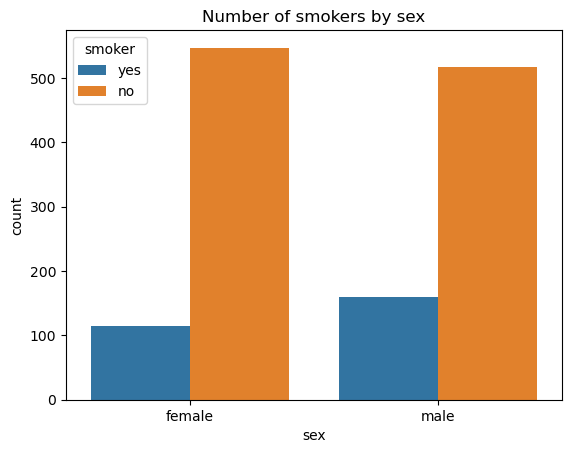

In [19]:
#First we can visualize smoking status by sex
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of smokers by sex");

In [20]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [21]:
# Run the Chi Square Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [22]:
# What was the p-value?
print(p)
p<.05

0.006548143503580696


True

- Because the P-value is < .05, we can reject the null hypothesis and accept the
alternate hypothesis that men are more likely to smoke than women.

# Q3: Do different regions have different charges, on average?

## 1. State the Hypothesis & Null Hypothesis
 - (Null Hypothesis): All regions have the same charges
 - (Alternative Hypothesis): Different regions have different charges, on average

## 2. Determine the correct test to perform.
- Type of Data? categorical
- How many groups/samples? 4
- Therefore, which test is appropriate? Chi Square

In [30]:
## Create groups dictionary.
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

### Running the test of normality

In [31]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [32]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


- We can confirm that there is not a normal distribution, p<.05

### Testing for assumption of variance

In [33]:
# Testing Assumption of Equal Variance 
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

- We have violated the assumption of variance and will use a non-parametric Kruskal-Wallis test to conduct the analysis instead

### Performing correct hypothesis test

In [34]:
# perform the correct hypothesis test
result = stats.kruskal( *groups.values())
result

KruskalResult(statistic=4.734181215658743, pvalue=0.19232908072121002)

- Based on the test we fail to reject the null hyposthesis becuase the p-value is > .05